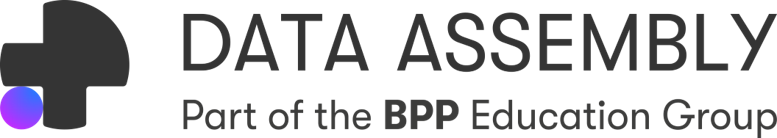

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Training, Testing and Validaiton Datasets](#section_1)
<br>2. [k-Fold Cross-Validation](#section_2)
<br>3. [Leave-One-Out Cross-Validation (LOOCV)](#section_3)
<br>4. [Stratified k-Fold Cross-Validation](#section_4)
<br>5. [Hyperparameter Tuning](#section_5)


<h2><font color="#AA00BB">Welcome to our workbook on Validation Methods & Model Tuning!</font></h2>

Partitioning your data is crucial for building models that perform well on unseen data. It's like creating a blueprint for a building that stands the test of time. Without proper partitioning, your models may fail in the real world.

Let's get started!

<a name="section_1"></a>

# **1. Training, Testing and Validaiton Datasets**


[Return to contents](#contents)


Let's dive into an example where we create a simple model using a dataset, then alter the ratios of training, validation, and test sets to observe the impact on model accuracy.

We'll use the widely-known Iris dataset for this purpose, which is a good starting point for classification problems. The Iris dataset includes data on sepal length, sepal width, petal length, and petal width of 150 iris flowers from three different species.

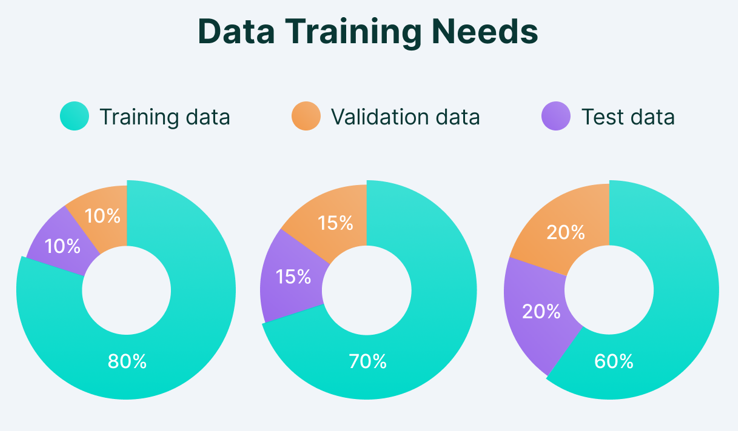

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Initial split ratio: 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_val = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)

# Test the model on the test set
y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Validation Accuracy {val_accuracy}')
print(f'Test Accuracy {test_accuracy}')

Validation Accuracy 1.0
Test Accuracy 0.9666666666666667


In [2]:
# Adjusted split ratio: 80% training, 10% validation, 10% test
X_train_80, X_temp_80, y_train_80, y_temp_80 = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_80, X_test_80, y_val_80, y_test_80 = train_test_split(X_temp_80, y_temp_80, test_size=0.5, random_state=42)

# Train the model on the adjusted training set
clf.fit(X_train_80, y_train_80)

# Validate the model on the adjusted validation set
y_pred_val_80 = clf.predict(X_val_80)
val_accuracy_80 = accuracy_score(y_val_80, y_pred_val_80)

# Test the model on the adjusted test set
y_pred_test_80 = clf.predict(X_test_80)
test_accuracy_80 = accuracy_score(y_test_80, y_pred_test_80)

print(f'Validation Accuracy {val_accuracy_80}')
print(f'Test Accuracy {test_accuracy_80}')


Validation Accuracy 1.0
Test Accuracy 1.0


In [3]:
# Balanced split ratio: Approximately 33% training, 33% validation, 34% test
# Due to rounding, we might not get exactly 33% for each, but we aim to distribute as evenly as possible.
X_train_33, X_temp_33, y_train_33, y_temp_33 = train_test_split(X, y, test_size=0.67, random_state=42)
X_val_33, X_test_33, y_val_33, y_test_33 = train_test_split(X_temp_33, y_temp_33, test_size=0.51, random_state=42)  # Adjusted to get as close to 33% splits as possible

# Train the model on the balanced training set
clf.fit(X_train_33, y_train_33)

# Validate the model on the balanced validation set
y_pred_val_33 = clf.predict(X_val_33)
val_accuracy_33 = accuracy_score(y_val_33, y_pred_val_33)

# Test the model on the balanced test set
y_pred_test_33 = clf.predict(X_test_33)
test_accuracy_33 = accuracy_score(y_test_33, y_pred_test_33)

print(f'Validation Accuracy {val_accuracy_33}')
print(f'Test Accuracy {test_accuracy_33}')

Validation Accuracy 0.9387755102040817
Test Accuracy 0.9423076923076923


### **Summary of Results**
- **Initial Split (60% training, 20% validation, 20% test)**: Validation accuracy = 100%, Test accuracy = 96.7%
- **Adjusted Split (80% training, 10% validation, 10% test)**: Validation accuracy = 100%, Test accuracy = 100%
- **Balanced Split (~33% training, ~33% validation, 34% test)**: Validation accuracy = 93.9%, Test accuracy = 94.2%

These experiments illustrate the impact of varying training, validation, and test set ratios on model accuracy. Generally, providing more data for training helps improve model accuracy on unseen data, though the optimal split can depend on the specific characteristics of the dataset and the complexity of the model

# ⌨️ **Exercise**

1. Try to experiement with different splits and note the results.

In [4]:
#@title Click the play button to run the code and view the question.

import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the question and options
question = widgets.HTML(value="<b>What should be your largest dataset segment?</b>")
options = ['Training data',
           'Testing data',
           'Validation data',
           'They should all be equal']
correct_answer = 'Training data'

# Create RadioButtons for options with improved styling
radio_buttons = widgets.RadioButtons(
    options=options,
    description='Answers:',
    layout={'width': 'max-content'}  # This can help prevent text wrapping issues
)

# Create a button for submissions
submit_button = widgets.Button(
    description="Submit",
    button_style='success',  # Adds color to the button
    layout={'width': '300px'}  # Set the width of the button
)

# Create an output widget for displaying responses
output = widgets.Output()

# Define the event handler for the submission button
def on_submit(b):
    with output:
        clear_output()
        # Display the result with HTML styling for background color
        if radio_buttons.value == correct_answer:
            display(widgets.HTML(value=f"<div style='background-color: #4CAF50; color: white; padding: 10px;'>Correct! Well done.</div>"))
        else:
            display(widgets.HTML(value=f"<div style='background-color: #F44336; color: white; padding: 10px;'>Incorrect. The correct answer is: {correct_answer}</div>"))

# Link the button click event to the event handler
submit_button.on_click(on_submit)

# Display the widgets
display(question, radio_buttons, submit_button, output)


HTML(value='<b>What should be your largest dataset segment?</b>')

RadioButtons(description='Answers:', layout=Layout(width='max-content'), options=('Training data', 'Testing da…

Button(button_style='success', description='Submit', layout=Layout(width='300px'), style=ButtonStyle())

Output()

---

<a name="section_2"></a>

# **2. k-Fold Cross-Validation**


[Return to contents](#contents)



k-Fold Cross-Validation is a statistical method used to evaluate the performance of a machine learning model. It is particularly useful for assessing how a model will generalize to an independent dataset. This method involves partitioning the original sample into k equal-sized folds. Consequently, the model is trained on k-1 folds while the remaining fold is used for testing. This process is repeated k times (folds), with each of the k folds used exactly once as the test set. Finally, the k results from the folds can then be averaged to produce a single estimation.

The primary advantage of k-fold cross-validation is that all observations are used for both training and testing, providing each observation with the opportunity to be in the held-out fold. This method helps in utilising the data efficiently, especially when the dataset is limited in size.

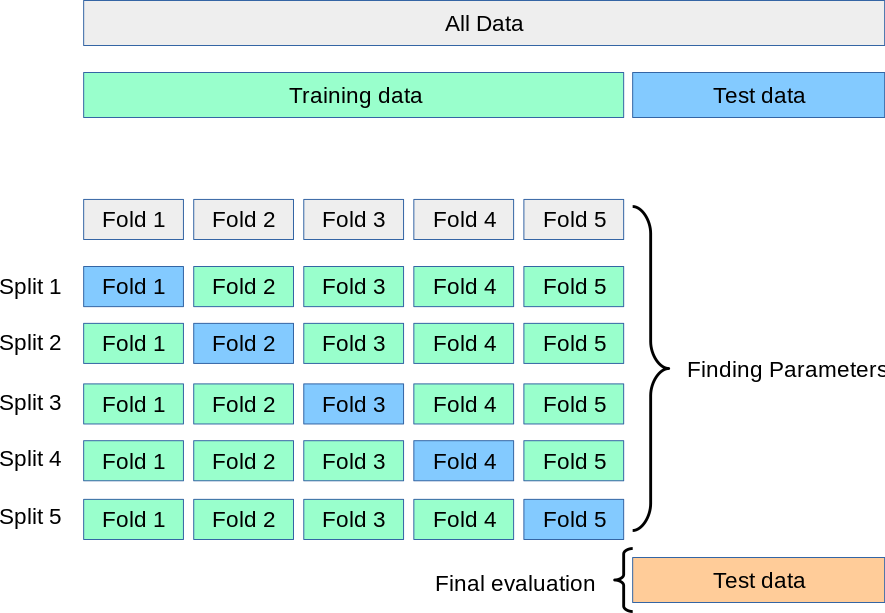

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X, y, cv=5)

print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

Accuracy scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy score: 0.9733333333333334


# ⌨️ **Exercise**

1. Try different number of folds and evaluate the results.

<a name="section_3"></a>

# **3. Leave-One-Out Cross-Validation (LOOCV)**


[Return to contents](#contents)

Leave-One-Out Cross-Validation (LOOCV) is a specific case of k-fold cross-validation where k equals the number of observations in the dataset. In LOOCV, each observation is used as a separate test set, while the remainder of the data is used for training. This method is exhaustive and can be computationally expensive for large datasets, but it's beneficial for small datasets as it maximizes both the training and testing data.

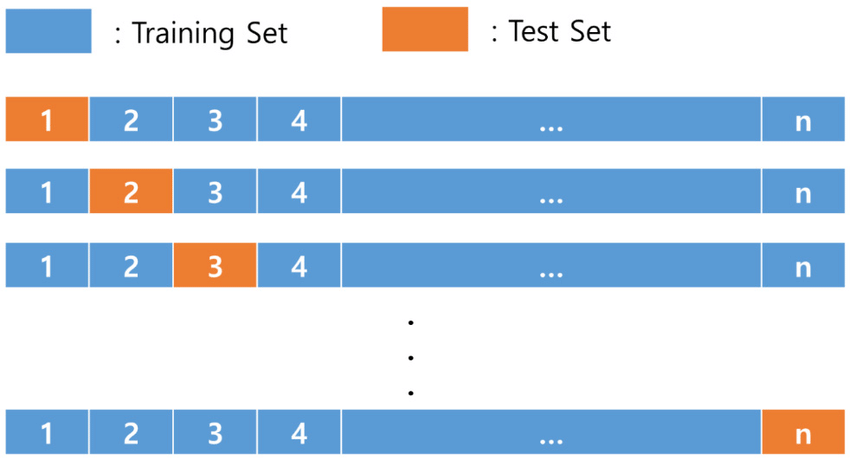

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=200)
loo = LeaveOneOut()
scores_loocv = cross_val_score(model, X, y, cv=loo)

print(f"Number of cv iterations: {len(scores_loocv)}")
print("Mean accuracy:", scores_loocv.mean())

Number of cv iterations: 150
Mean accuracy: 0.9666666666666667


<a name="section_4"></a>

# **4. Stratified k-Fold Cross-Validation**


[Return to contents](#contents)



Stratified k-Fold Cross-Validation is a variation of k-fold that returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. It is especially useful for imbalanced datasets.

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=200)

stratified_kfold = StratifiedKFold(n_splits=5)
scores_stratified = cross_val_score(model, X, y, cv=stratified_kfold)

print("Accuracy scores for each fold:", scores_stratified)
print("Mean accuracy score:", scores_stratified.mean())

Accuracy scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy score: 0.9733333333333334


# ⌨️ **Exercise**

1. Experiment with different n_splits values to observe how they affect model performance. Additionally, you can adjust the shuffle parameter to True and set a random_state for reproducibility. Explore how shuffling the data before splitting affects the results.

In [8]:
#@title Click the play button to run the code and view the question.

import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the question and options
question = widgets.HTML(value="<b>Stratified k-Fold Cross-Validation is particularly useful for?</b>")
options = ['Large datasets to reduce computation time.',
           'Datasets with an equal number of samples in each class.',
           'Imbalanced datasets to ensure each fold maintains the overall class distribution',
           'Datasets where the order of samples is important.']
correct_answer = 'Imbalanced datasets to ensure each fold maintains the overall class distribution'

# Create RadioButtons for options with improved styling
radio_buttons = widgets.RadioButtons(
    options=options,
    description='Answers:',
    layout={'width': 'max-content'}  # This can help prevent text wrapping issues
)

# Create a button for submissions
submit_button = widgets.Button(
    description="Submit",
    button_style='success',  # Adds color to the button
    layout={'width': '300px'}  # Set the width of the button
)

# Create an output widget for displaying responses
output = widgets.Output()

# Define the event handler for the submission button
def on_submit(b):
    with output:
        clear_output()
        # Display the result with HTML styling for background color
        if radio_buttons.value == correct_answer:
            display(widgets.HTML(value=f"<div style='background-color: #4CAF50; color: white; padding: 10px;'>Correct! Well done.</div>"))
        else:
            display(widgets.HTML(value=f"<div style='background-color: #F44336; color: white; padding: 10px;'>Incorrect. The correct answer is: {correct_answer}</div>"))

# Link the button click event to the event handler
submit_button.on_click(on_submit)

# Display the widgets
display(question, radio_buttons, submit_button, output)


HTML(value='<b>Stratified k-Fold Cross-Validation is particularly useful for?</b>')

RadioButtons(description='Answers:', layout=Layout(width='max-content'), options=('Large datasets to reduce co…

Button(button_style='success', description='Submit', layout=Layout(width='300px'), style=ButtonStyle())

Output()